

# Project: Investigate the TMDB  Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The selected TMDb movie dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.it also include moviews budget, gener and release date. <br>
using the available data I will visualize the trend of movie production over the years, extract summaries about profits , movie production per year , per gener and explor the relation between gener , popularity , buget and revenue.

### Resources
These website were used in the creation of the code below.
<li>https://www.w3schools.com/</li>
<li>https://pandas.pydata.org/</li>
<li>https://stackoverflow.com/questions/15705630/get-the-rows-which-have-the-max-value-in-groups-using-groupby</li>


In [33]:
# imports and load data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


<a id='wrangling'></a>
## Data Wrangling
in this step I will explor dataset column and datatypes and drop un-needed columns for this project.

### General Properties

In [2]:
# Load data from books.csv 
books = pd.read_csv('books.csv',sep=',',error_bad_lines=False)
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


## Observation

1) We have total <b>12 columns</b> with a max of <b>11123 entries</b> in each column.<br/>
2) Data has no missing values nor nulls.<br/>
3) Some columns need renaming and shorten for better usage and display.<br/>
4) Columns:bookID,isbn,isbn13 are not needed for this analysis and will be dropped.<br/>
5) For this analysis we don't need "publication date" I will extract year in a new column and drop "publication date"<br/>
6) Columns except "publication date" are in good data type.<br/>

In [4]:
# extract publication year to a new column
books['publication_year']=books['publication_date'].str[-4:]

In [23]:
# the publication_year column is not in correct datatype
books['publication_year']=books['publication_year'].astype('category')
# the lang column is not in correct datatype
books['lang']=books['lang'].astype('category')
books.dtypes

title                 object
authors               object
rating               float64
lang                category
pages                  int64
ratings_count          int64
reviews                int64
publisher             object
publication_year    category
dtype: object

## Dropping unwanted columns

In [5]:
books.drop(['bookID','isbn','isbn13','publication_date'],axis =1,inplace = True)

In [6]:
books.columns

Index(['title', 'authors', 'average_rating', 'language_code', '  num_pages',
       'ratings_count', 'text_reviews_count', 'publisher', 'publication_year'],
      dtype='object')

## Renaming columns

In [7]:
books.rename(columns={'average_rating':'rating','language_code':'lang','  num_pages': 'pages','text_reviews_count':'reviews'},inplace=True)

In [8]:
print("Final columns in dataset (Rows,Columns) : ",books.shape)

Final columns in dataset (Rows,Columns) :  (11123, 9)


In [22]:
books.head()

,title,authors,rating,lang,pages,ratings_count,reviews,publisher,publication_year
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,Scholastic Inc.,2006
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,Scholastic Inc.,2004
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,Scholastic,2003
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,Scholastic Inc.,2004
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,Scholastic,2004


<b>Nominal variables:</b> title, authors,publisher<br>
<b>Categorical variables: </b>lang , publication _year<br>
<b>Quantitative variable:</b> pages,ratings_count,reviews<br>
<b>Qualitative Variable:</b> rating<br>


### Data Cleaning 
in this step I will examine the data for duplicates and empty / NAN fields.

In [13]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             11123 non-null  object 
 1   authors           11123 non-null  object 
 2   rating            11123 non-null  float64
 3   lang              11123 non-null  object 
 4   pages             11123 non-null  int64  
 5   ratings_count     11123 non-null  int64  
 6   reviews           11123 non-null  int64  
 7   publisher         11123 non-null  object 
 8   publication_year  11123 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 782.2+ KB


we still have some missing data in columns (director , genres)

In [14]:
#checking for null values
books.isna().sum()

title               0
authors             0
rating              0
lang                0
pages               0
ratings_count       0
reviews             0
publisher           0
publication_year    0
dtype: int64

In [17]:
# checking for duplicates
books.duplicated().sum()

0

## Observation

The data has no null or missing values and has no duplicated rows.

### Final Dataset after cleaning

In [19]:
books.shape

(11123, 9)

### Summary statistics

In [20]:
books.describe()

,rating,pages,ratings_count,reviews,publication_year
count,11123.000000,11123.000000,1.112300e+04,11123.000000,11123.000000
mean,3.934075,336.405556,1.794285e+04,542.048099,2000.169019
std,0.350485,241.152626,1.124992e+05,2576.619589,8.247227
min,0.000000,0.000000,0.000000e+00,0.000000,1900.000000
25%,3.770000,192.000000,1.040000e+02,9.000000,1998.000000
50%,3.960000,299.000000,7.450000e+02,47.000000,2003.000000
75%,4.140000,416.000000,5.000500e+03,238.000000,2005.000000
max,5.000000,6576.000000,4.597666e+06,94265.000000,2020.000000


<a id='eda'></a>
## Exploratory Data Analysis

In this section I'm trying to answer the following questions:
<ol>
<li>Calcualte and visualize the books/language ratio</li>
<li>which year has the <b>max/min production</b> of books</li>
<li>which book has the <b>max/min ratings </b></li>
<li>which books has the<b> max/min reviews </b> of all times</li>
<li>which authors has the <b>max/min reviews</b></li>
<li>which authors has the <b>max/min ratings</b> </li>
</ol>



In [42]:
eng_books=books.isin(['en-CA','en-GB','en-US','eng']).groupby('lang').count()['title']
eng_books

lang
False      586
True     10537
Name: title, dtype: int64

C:\Users\shaimaa\miniconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


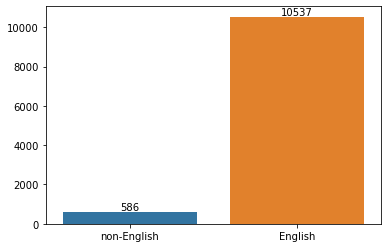

In [86]:
sb.barplot(['non-English','English'],eng_books.to_numpy())
 
for i in range (eng_books.shape[0]):
    count = eng_books[i]

    # Refer here for details of the text() - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html
    plt.text( x=i, y=count+500, s=count, ha = 'center', va='top')
    

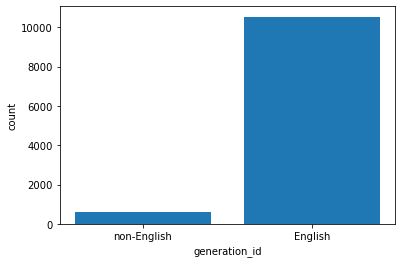

In [80]:
plt.bar(['non-English','English'],eng_books.to_numpy())
# Labeling the axes
plt.xlabel('generation_id')
plt.ylabel('count')

# Dsiplay the plot
plt.show()

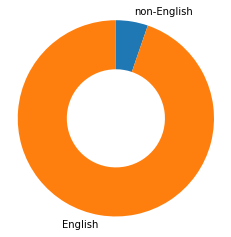

In [73]:
plt.pie(eng_books, labels = ['non-English','English'], startangle = 90, counterclock = False,wedgeprops = {'width' : 0.5});
plt.axis('square');

### 1. Books production during last 20 years

In [111]:
# Group data by year
yearly_prod=books.groupby('publication_year').count()['title'].tail(20)
years=yearly_prod.reset_index()
years

,publication_year,title
0,2001,656
1,2002,798
2,2003,931
3,2004,1069
4,2005,1260
5,2006,1700
6,2007,518
7,2008,49
8,2009,42
9,2010,37


<BarContainer object of 20 artists>

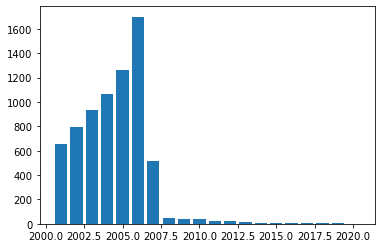

In [113]:
plt.bar(years.publication_year.to_numpy(),years.title)

In [114]:
print('Average production in the last 10 years: ',years.mean())
print('Max production : ',years.max())
print('Min production : ',years.min())


Average production in the last 10 years:  title    358.2
dtype: float64
Max production :  title    1700
dtype: int64
Min production :  title    1
dtype: int64


(array([1.1052e+04, 3.8000e+01, 1.3000e+01, 8.0000e+00, 7.0000e+00,
        4.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([      0. ,  459766.6,  919533.2, 1379299.8, 1839066.4, 2298833. ,
        2758599.6, 3218366.2, 3678132.8, 4137899.4, 4597666. ]),
 <BarContainer object of 10 artists>)

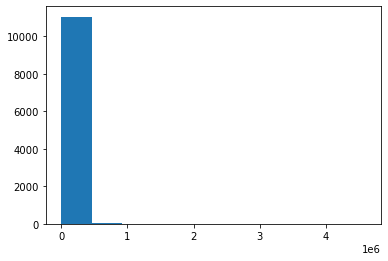

### 2. Top 20 rated books on Goodreads

In [216]:
### sort dataset by ratings
median=books.ratings_count.median()
books_ratings=books[(books.rating>4.5) & (books.ratings_count>median)].sort_values(by=['ratings_count','rating'],ascending=False).head(20)
books_ratings.set_index('title',drop=True,inplace=True)
books_ratings


,authors,rating,lang,pages,ratings_count,reviews,publisher,publication_year
title,,,,,,,,
Harry Potter and the Prisoner of Azkaban (Harry Potter #3),J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,Scholastic Inc.,2004
Harry Potter and the Half-Blood Prince (Harry Potter #6),J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,Scholastic Inc.,2006
The Complete Maus,Art Spiegelman,4.55,eng,296,111475,5966,Penguin Books,2003
J.R.R. Tolkien 4-Book Boxed Set: The Hobbit and The Lord of the Rings,J.R.R. Tolkien,4.59,eng,1728,101233,1550,Ballantine Books,2012
Season of Mists (The Sandman #4),Neil Gaiman/Matt Wagner/George Pratt/Dick Gior...,4.54,eng,217,50951,1038,Vertigo,1999
The Calvin and Hobbes Tenth Anniversary Book,Bill Watterson,4.63,eng,208,49122,368,Andrews McMeel Publishing,1995
Harry Potter Boxed Set Books 1-5 (Harry Potter #1-5),J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,Scholastic,2004
The Wake (The Sandman #10),Neil Gaiman/Michael Zulli/Jon J. Muth/Charles ...,4.52,eng,191,37038,767,Vertigo,1999
The Complete Calvin and Hobbes,Bill Watterson,4.82,eng,1456,32213,930,Andrews McMeel Publishing,2005


### Top 20 Highest rating authors

Text(0.5, 1.0, 'Top 10 authors with most books')

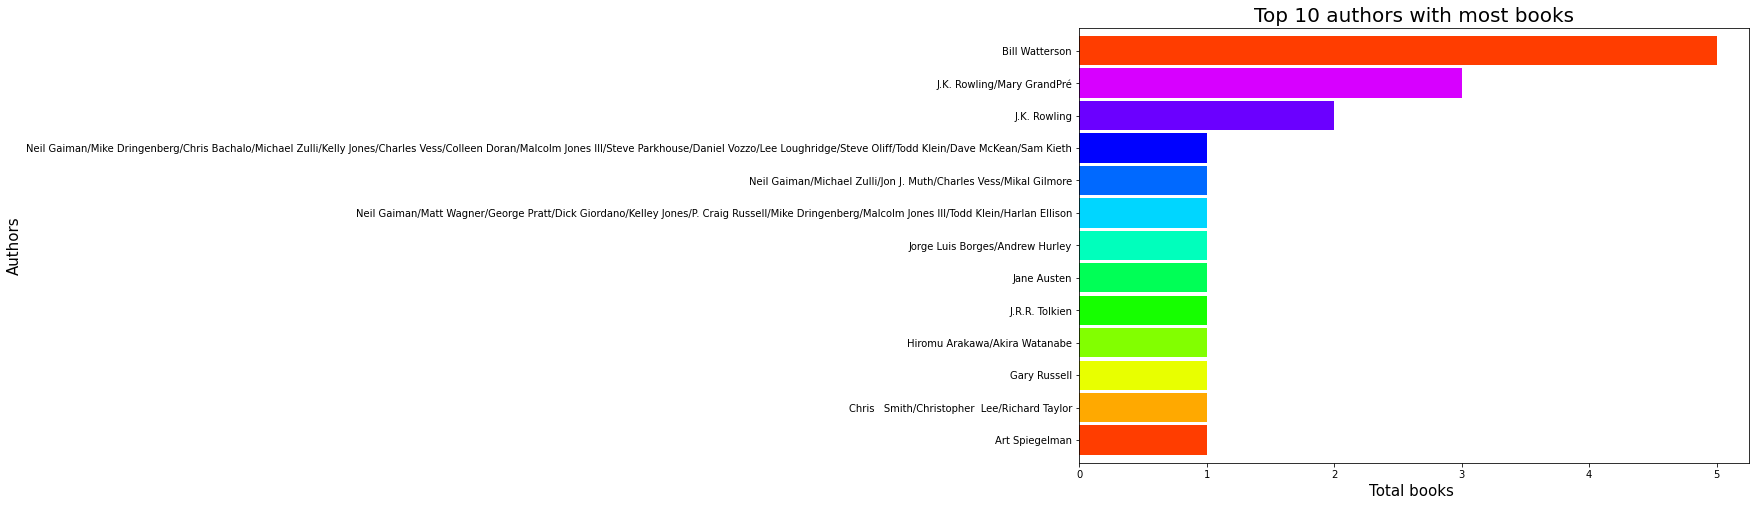

In [217]:
plt.subplots(figsize=(12,8))
ax = books_ratings.groupby("authors").count()['rating'].sort_values().plot.barh(width=0.9,color=sb.color_palette('gist_rainbow',12))
ax.set_xlabel("Total books ", fontsize=15)
ax.set_ylabel("Authors", fontsize=15)
ax.set_title("Top 20 authors with highest rated books",fontsize=20,color='black')

In [218]:
highest_rated=books[books['rating']>=4.5]
lowest_rated=books[books['rating']<=2.5]
print('\nHighest rated books\n',highest_rated[["title"]])
print('-'*40)
print('\nLowest rated books\n',lowest_rated[["title"]])


Highest rated books
                                                    title
0      Harry Potter and the Half-Blood Prince (Harry ...
3      Harry Potter and the Prisoner of Azkaban (Harr...
4      Harry Potter Boxed Set  Books 1-5 (Harry Potte...
6           Harry Potter Collection (Harry Potter  #1-6)
21     J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...
...                                                  ...
10675  Harry Potter and the Goblet of Fire (Harry Pot...
10790                                       Looking East
10918  Fullmetal Alchemist  Vol. 6 (Fullmetal Alchemi...
10937  The Price of the Ticket: Collected Nonfiction ...
10940  Code Check Electrical: An Illustrated Guide to...

[230 rows x 1 columns]
----------------------------------------

Lowest rated books
                                                    title
265    Out to Eat London 2002 (Lonely Planet Out to Eat)
375                       Juiced Official Strategy Guide
987             Open City 6: The Only

### 3.which book has the max/min reviews

In [223]:
max_reviews=books[books['reviews']==books['reviews'].max()]
max_reviews[["title","authors","rating","reviews"]].head()


,title,authors,rating,reviews
10336,Twilight (Twilight #1),Stephenie Meyer,3.59,94265


In [224]:
min_reviews=books[books['reviews']==books['reviews'].min()]
min_reviews[["title","authors","rating","reviews"]].head()

,title,authors,rating,reviews
31,Molly Hatchet - 5 of the Best,Molly Hatchet,4.33,0
77,The Power of One: The Solo Play for Playwright...,Louis E. Catron,3.67,0
80,What to Sell on ebay and Where to Get It: The ...,Chris Malta/Lisa Suttora,3.62,0
82,eBay: Top 100 Simplified Tips & Tricks,Julia Wilkinson,4.27,0
102,Dalit: The Black Untaouchables of India,V.T. Rajshekar/Y.N. Kly,4.20,0


<a id='conclusions'></a>
## Conclusions
Using the dataset samples (3854 after cleaning) and during years (1960 : 2015 ) I found the following:
<ul>
<li>Movie production is steadly increasing every year with an average around 170 movie per year in the last decade.</li>
<li>2011 was the year with the highest production with 199 movie released that year.</li>
<li> "Avatar" is the highest profit movie of the recorded samples also "The Warrior's Way" is the Lowest profit movie of of the recorded samples </li>
<li> Out of 3854 movies there were 22 movie with a vote average above 8 and 9 movies below 3.5 of vote average.</li>
<li> The genre "Comedy" has the highest profit of 12183078642 US dollar.</li>
<li> Comedy is the most poular genre of all movies in the dataset.</li>
</ul>

## Limitations
<li>The dataset contained missing values in (Budget, revenue) columns, which may affect the analysis after dropping rows of missing values:<br/>
Zero Budget rows: 5696 And Zero revenue rows: 6016

</li>

<li>
Mixed genres affect the genre profits analysis which can be improved by separate genrs or using another approach with this analysis.    
</li>
        
## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])